# Data set para entrenar la red neuronal

## Modelo de segundo orden
Se propone un modelo de segundo orden al azar para generar el conjunto de datos (data set) para entrenar una red neuronal.

Importamos las librerías necesarias

In [1]:
import numpy as np
import control as co
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

Fijamos el tamaño de la gráfica y la fuente.

In [2]:
plt.rcParams['figure.figsize'] = [14,7]
plt.rcParams['font.size'] = 14

Creamos una planta cualquiera.

In [3]:
num = [10]
den = [1,2,4]
G1 = co.tf(num,den)
G1

TransferFunction(array([10]), array([1, 2, 4]))

Visualizamos el comportamiento de la planta a través del tiempo.

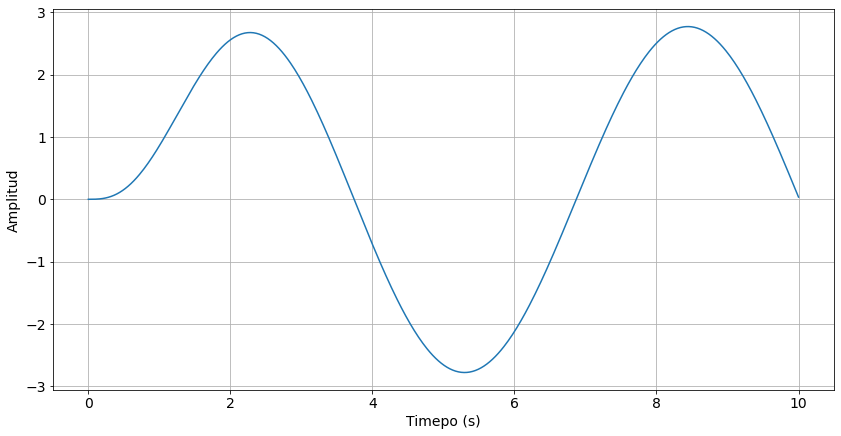

In [4]:
t_s = 10 #Timepo de simulacion
r = 500 #muestreo

t = np.linspace(0,t_s,r)
u = np.sin(t)
t1, y1 = co.forced_response(G1,t,u)

plt.plot(t1,y1)
plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.grid()

Ahora se van a generar la base de datos con 100 distintas entradas a la planta G1. La entrada U va de 0 a 25.

In [5]:
n_i = 100 #Numero de entradas

y = np.zeros((n_i,r))
u = np.array([i*(np.sin(t)*0.25) for i in range(n_i)]) #np.sin(t) 
for i in range(n_i):
    t1, y[i]= co.forced_response(G1,t,u[i])
#Donde la renglones de "y" son la entrada u y las columnas las salidas del sistema

Creamos una grafica en 3D  para apreciar el comportamiento de la planta con distintas entradas

C:\Users\osciv\AppData\Local\Temp/ipykernel_540/2543590747.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


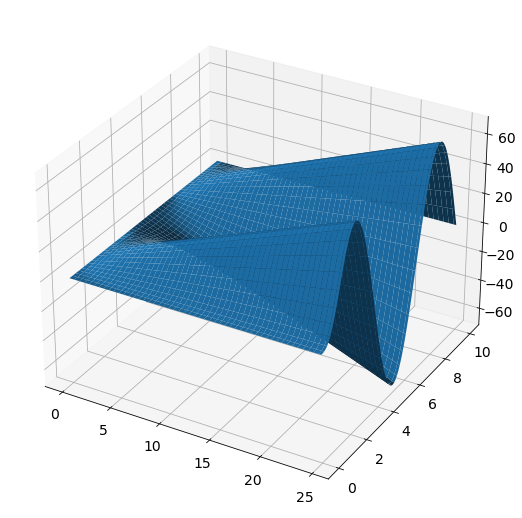

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
#u = np.zeros((50,))
X,Y = np.meshgrid(np.array([i*0.25 for i in range(n_i)]),t)
ax.plot_surface(X, Y, y.T)

Agregamos "ruido" para hacer mas realista el dataset

In [13]:
np.savetxt('planta_training_SIN.csv', y, delimiter=',')
for i in range(n_i):
    y[i][:] = y[i][:]+0.025*np.random.randn(y.T.shape[0])

Visualizamos 3 entradas distintas

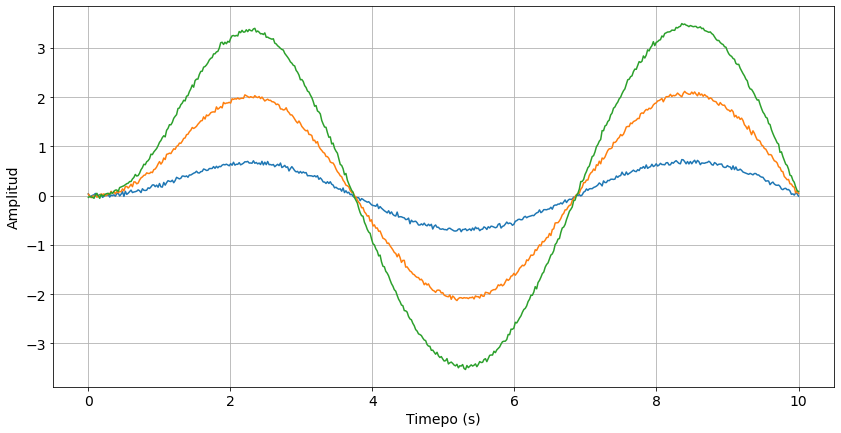

In [14]:
y2 =  y[1][:]
y3 =  y[3][:]
y4 =  y[5][:]

plt.plot(t,y2)
plt.plot(t,y3)
plt.plot(t,y4)

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.grid()

Ahora exportaremos los datos de Y en un formato csv para entrenar a la red neuronal

In [15]:
np.savetxt('planta_training_SIN_R.csv', y, delimiter=',')

Creamos un data set para validación, con entradas u = 26, 27.5, 40.

In [16]:
y_val = np.zeros((3,r))
u = np.array([26*np.sin(t),27.5*np.sin(t),40*np.sin(t)])
for i in range(len(u)):
    t1, y_val[i]= co.forced_response(G1,t,u[i])
np.savetxt('planta_validation_SIN.csv', y_val, delimiter=',') 
   
for i in range(3):
    y_val[i][:] = y_val[i][:]+0.025*np.random.randn(y_val.T.shape[0])

    
#Donde la renglones de "y" son la entrada u y las columnas las salidas del sistema
np.savetxt('planta_validation_SIN_R.csv', y_val, delimiter=',')


Visualizamos el comportamiento de la planta con las tres entradas u = 26, 27.5, 40.

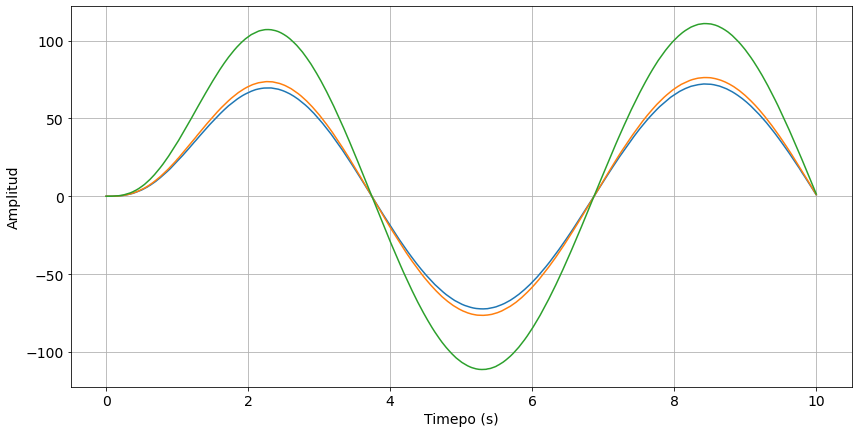

In [17]:
y_26   = y_val[0][:]
y_27_5 = y_val[1][:]
y_40   = y_val[2][:]

plt.plot(t,y_26)
plt.plot(t,y_27_5)
plt.plot(t,y_40)

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.grid()